# Example

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
% matplotlib inline

from madminer.madminer import MadMiner

## 1. Create MadMiner object

In [2]:
miner = MadMiner()

## 2. Define parameter space

In [17]:
miner.set_parameters()

miner.add_parameter(
    lha_block='ANOINPUTS',
    lha_id=3,
    parameter_name='fW',
    morphing_max_power=4,
    morphing_parameter_range=(-1.,1.)
)
miner.add_parameter(
    lha_block='ANOINPUTS',
    lha_id=7,
    parameter_name='fWW',
    morphing_max_power=4,
    morphing_parameter_range=(-1.,1.)
)

miner.parameters

OrderedDict([('fW', ('ANOINPUTS', 3, 4, (-1.0, 1.0))),
             ('fWW', ('ANOINPUTS', 7, 4, (-1.0, 1.0)))])

## 3a. Define benchmark points manually

In [4]:
thetas_old = np.array([[ 0.        ,  0.        ],
       [-0.8318245 ,  0.85645093],
       [-0.82002127, -0.85191237],
       [ 0.76870769, -0.81272456],
       [ 0.7819962 ,  0.86242685],
       [-0.57243257,  0.37755934],
       [-0.29730939,  0.74563426],
       [ 0.13777926,  0.35254704],
       [ 0.46330191,  0.51783982],
       [ 0.64649576, -0.01232633],
       [ 0.16629182, -0.29365045],
       [ 0.39752054, -0.64235507],
       [-0.19238158, -0.59962178],
       [-0.30730345, -0.09697784],
       [-0.70631846, -0.18913046]])

In [5]:
for theta in thetas_old:
    miner.add_benchmark(
        {'fW':theta[0], 'fWW':theta[1]}
    )

miner.benchmarks

OrderedDict([('benchmark_0', {'fW': 0.0, 'fWW': 0.0}),
             ('benchmark_1', {'fW': -0.8318245, 'fWW': 0.85645093}),
             ('benchmark_2', {'fW': -0.82002127, 'fWW': -0.85191237}),
             ('benchmark_3', {'fW': 0.76870769, 'fWW': -0.81272456}),
             ('benchmark_4', {'fW': 0.7819962, 'fWW': 0.86242685}),
             ('benchmark_5', {'fW': -0.57243257, 'fWW': 0.37755934}),
             ('benchmark_6', {'fW': -0.29730939, 'fWW': 0.74563426}),
             ('benchmark_7', {'fW': 0.13777926, 'fWW': 0.35254704}),
             ('benchmark_8', {'fW': 0.46330191, 'fWW': 0.51783982}),
             ('benchmark_9', {'fW': 0.64649576, 'fWW': -0.01232633}),
             ('benchmark_10', {'fW': 0.16629182, 'fWW': -0.29365045}),
             ('benchmark_11', {'fW': 0.39752054, 'fWW': -0.64235507}),
             ('benchmark_12', {'fW': -0.19238158, 'fWW': -0.59962178}),
             ('benchmark_13', {'fW': -0.30730345, 'fWW': -0.09697784}),
             ('benchmark_14', {'f

## 3b. Define benchmark points through morphing

In [12]:
miner.set_benchmarks_from_morphing(keep_existing_benchmarks=True,
                                   n_bases=2,
                                   n_trials=1000)

basis = []
for _, parameters in miner.benchmarks.items():
    basis.append([value for _, value in parameters.items()])
basis = np.array(basis)

In [13]:
xi = np.linspace(-1.,1.,100)
yi = np.linspace(-1.,1.,100)
xx, yy = np.meshgrid(xi, yi)
xx = xx.reshape((-1,1))
yy = yy.reshape((-1,1))
theta_test = np.hstack([xx, yy])

squared_weights = []
squared_weights_normalized = []

for theta in theta_test:
    wi = miner.current_morpher._calculate_morphing_weights(theta, None)
    squared_weights.append(np.sum(wi*wi)**0.5)
    
squared_weights = np.array(squared_weights).reshape((100,100))

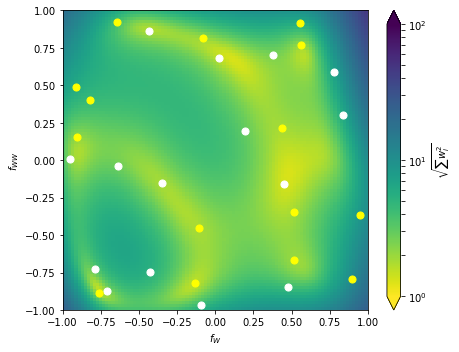

In [15]:
fig = plt.figure(figsize=(6.5,5))
ax = plt.gca()



pcm = ax.pcolormesh(xi, yi, squared_weights,
                   norm=matplotlib.colors.LogNorm(vmin=1., vmax=1.e2),
                   cmap='viridis_r')
cbar = fig.colorbar(pcm, ax=ax, extend='both')

plt.scatter(basis[:15,0], basis[:15,1], s=50., c='w')
plt.scatter(basis[15:,0], basis[15:,1], s=50., c='yellow')

plt.xlabel(r'$f_W$')
plt.ylabel(r'$f_{WW}$')
cbar.set_label(r'$\sqrt{\sum w_i^2}$')
plt.xlim(-1.,1.)
plt.ylim(-1.,1.)



plt.tight_layout()
plt.show()


## 4. Export parameter and reweight cards, integrating along two different scenarios

In [18]:
miner.export_cards(
    'templates/param_card_template.dat',
    'templates/reweight_card_template.dat',
    'MG_process_1'
)